In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
import os, sys

In [5]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

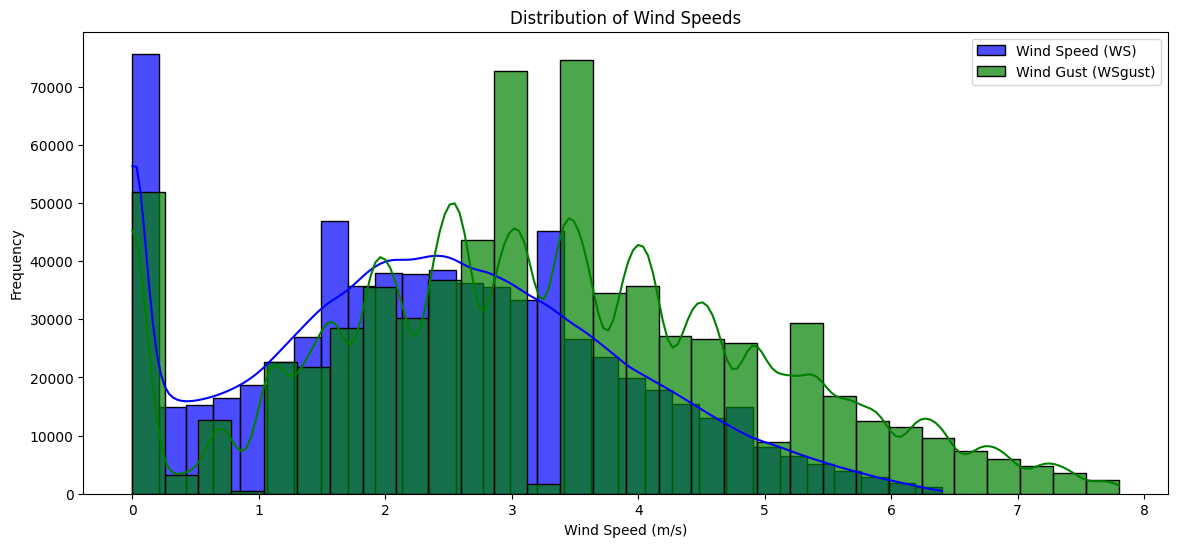

In [7]:
df = pd.read_csv("../data/processed/cleaned_data.csv", parse_dates=['Timestamp'])
    # Set the Timestamp as index for time series plotting
df.set_index('Timestamp', inplace=True)

    # **Step 1: Distribution of Wind Speed (WS and WSgust)**
plt.figure(figsize=(14, 6))

    # Distribution of wind speeds with KDE plot
sns.histplot(df['WS'], bins=30, kde=True, color='blue', alpha=0.7, label='Wind Speed (WS)')
sns.histplot(df['WSgust'], bins=30, kde=True, color='green', alpha=0.7, label='Wind Gust (WSgust)')
    
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

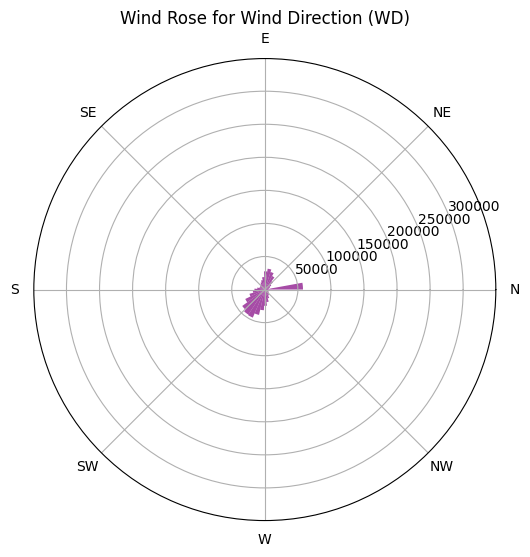

In [9]:
    # **Step 2: Wind Rose for Wind Direction (WD)**
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(14, 6))

    # Convert wind direction to radians once
df['WD_rad'] = np.deg2rad(df['WD'])

    # Plot wind rose with appropriate settings
ax.hist(df['WD_rad'], bins=np.linspace(0, 2 * np.pi, 36), color='purple', alpha=0.7)
    
    # Set labels and limits
ax.set_title('Wind Rose for Wind Direction (WD)')
ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], rotation=45)
ax.set_ylim(0, df['WD_rad'].count() / 2)

plt.show()